In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib3.request as p
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [123]:
df=pd.read_csv("data.csv")


In [124]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [125]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Checking Data for preprocessing**

In [126]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [128]:
df.shape

(25, 2)

***Visualizing the Data***

Text(0, 0.5, 'Scores')

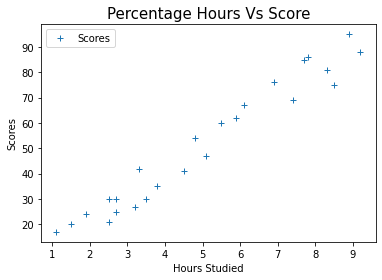

In [129]:
df.plot(x='Hours',y='Scores', style= "+")
plt.title("Percentage Hours Vs Score",fontsize = 15)
plt.xlabel("Hours Studied")
plt.ylabel("Scores")

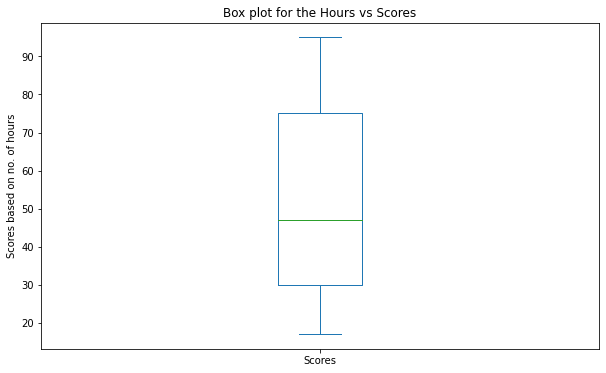

In [130]:
Data_scores = df['Scores']
Data_scores.plot(kind='box', figsize=(10, 6))
plt.title('Box plot for the Hours vs Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

In [131]:
## Checking the correlation between the hours of the study and the Scores
correlation = df.corr(method='pearson') 
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


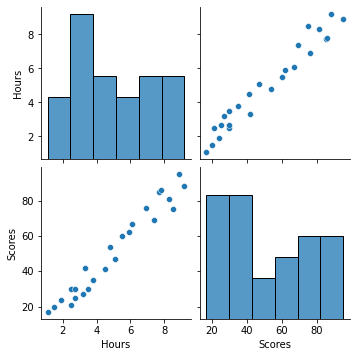

In [132]:
sns.pairplot(df)

# ***Preparing Data for Training***

In [133]:
## As X and Y both will be used for testing and training separatly 
## So taking out the values of x, y from the dataframe

X =df.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [134]:
y = df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

***After Preparing the Data, Deviding it into training and Testing***

In [135]:
## Importing the models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error



In [136]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=0)

In [137]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
#lr = LinearRegression()  
#lr.fit(X_train, y_train) 
print("Model implementing is completed")

Model implementing is completed


In [138]:
print("intercept is "+ str(lr.intercept_) + "and the cofficient is " + str(lr.coef_)) 

intercept is 2.018160041434662and the cofficient is [9.91065648]


In [139]:
## Equation of the line from the data
Y0 = lr.intercept_ + lr.coef_*X_train

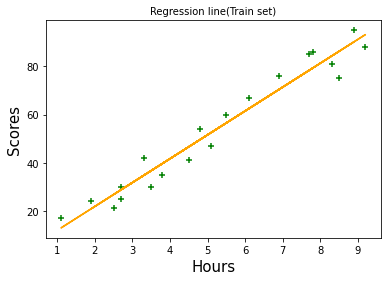

In [140]:
plt.scatter(X_train, y_train, color = "green", marker="+")
plt.plot(X_train, Y0, color = "orange" )
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [141]:
lr.score(X_train, y_train)*100

95.15510725211553

In [142]:
lr.score(X_test, y_test)*100

94.54906892105353

In [143]:
## predicting scores for the test set
y_predict = lr.predict(X_test)
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [144]:
y_test

array([20, 27, 69, 30, 62])

In [145]:
data = pd.DataFrame({"Actual value":y_test, "Predicted Value":y_predict})
data

,Actual value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


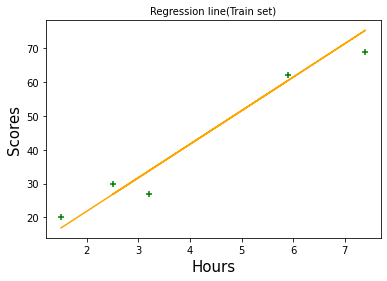

In [146]:
plt.scatter(X_test, y_test, color = "green", marker="+")
plt.plot(X_test, y_predict, color = "orange" )
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

**Finding the error in the model**

In [150]:
from sklearn import metrics
matrics.r2_score(y_test,y_predict)

NameError: ignored